In [1]:
from tournament import tournament
from reporting import Reporting
import importlib
from collections import namedtuple
from game_agent_comp import CustomPlayerComp
from value_functions import improved_score_fast_x2,improved_score_fast,\
    improved_score_fast_x3, partition_score_x2
from sample_players import null_score
from policy import SimplePolicy
#importlib.reload(reporting)
Agent = namedtuple("Agent", ["player", "name"])

#r = Reporting()
#r.report = []
if False:
    CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}

    my_part_x2 = Agent(CustomPlayerComp(score_fn=partition_score_x2, **CUSTOM_ARGS),
                       "Partitioning with two steps")
    my_x3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x3, **CUSTOM_ARGS),
          "improved, three steps exact")
    my_x1 = Agent(CustomPlayerComp(score_fn=improved_score_fast, **CUSTOM_ARGS),
          "Faster improved")                        

    my_x2 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,**CUSTOM_ARGS), 
                      "improved, two steps exact, with reporting")

    my_null = Agent(CustomPlayerComp(score_fn=null_score,method = 'minimax', iterative = True),
                           "Null score minimax ID")

    policy_5 = SimplePolicy(5,  improved_score_fast_x2 )
    policy_3 = SimplePolicy(3,  improved_score_fast_x2 )

    my_policy_x2_5 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                            policy = policy_5, **CUSTOM_ARGS), 
                      "simple policy, max 3 moves")

    my_policy_x2_3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                            policy = policy_3, **CUSTOM_ARGS), 
                      "simple policy, max 5 moves")

    #test_agents = [my_policy_x2]#my_null,my_x1, my_x2 , my_x3, my_part_x2]

    test_agents = [my_policy_x2_3, my_policy_x2_5, my_x1, my_x2 , my_x3, my_part_x2]

    tournament(num_matches = 10, test_agents = test_agents)

In [2]:
if False:# process the moves statistics
    test_agents = [my_null,my_x1, my_x2, my_x3, my_part_x2,my_policy_x2_3,my_policy_x2_5]

    r = Reporting()

    depths = get_depths(r.report, test_agents, lambda x: (x['depth'],x['score']))
    print(depths)

In [3]:
import pickle, glob

files = glob.glob('data/result_ID*.pickle')
print(files)

depths = {}
for file in files:
    try:
        with open(file, 'rb') as handle:
            old_depths = pickle.load(handle)
            #print(old_depths)
    except:
        old_depths={}

    #print(old_depths)
    for d in old_depths:
        for p, v in d.items():
            if p not in depths:
                depths[p]=v
            else:
                depths[p] = depths[p]+v

#with open('result.pickle', 'wb') as handle:
#    pickle.dump(depths, handle)
#print(depths)

print(depths.keys())

['data\\result_ID_x2_1.pickle', 'data\\result_ID_x2_2.pickle', 'data\\result_ID_x2_3.pickle', 'data\\result_ID_x2_4.pickle', 'data\\result_ID_x2_5.pickle', 'data\\result_ID_x2_6.pickle', 'data\\result_ID_x2_7.pickle', 'data\\result_ID_x2_8.pickle', 'data\\result_ID_x2_9.pickle']
dict_keys(['improved, two steps exact'])


In [4]:
# collate all moves in one big list
moves = []
#for player, games in depths.items():
games=depths['improved, two steps exact']
for game in games:
    for move in game:
        if move['score'] != float('inf') and move['score'] != float('-inf'):
            moves.append(move)
print(len(moves))
#print(nice_allscores(moves[0]['allscores']))

232459


In [5]:
def transpose_list_of_lists(lol):
    
    transp = []

    for game in lol:
        for m, move_depth in enumerate(game):
            if len(transp) <= m:
                transp.append([])
            transp[m].append(move_depth)
    return transp



In [6]:
#%pdb
from statistics import mean, stdev, median
import numpy as np

def get_mean_std(lol):
    result = {'mu':[], 'std':[],'median':[], 'strict_win':[], 'strict_loss':[]}
    
    for move in lol:
        if len(move) > 2:
            result['mu'].append(mean([m['depth'] for m in move]))
            result['std'].append(stdev([m['depth'] for m in move]))
            result['median'].append(median([m['depth'] for m in move]))
            result['strict_win'].append(\
                len([ m['score'] for m in move if m['score'] == float('inf')]) / len(move))
            result['strict_loss'].append(\
                len([ m['score'] for m in move if m['score'] == float('-inf')]) / len(move))
            
            
    result['mu'] = np.array(result['mu'] )
    result['std'] = np.array(result['std'])
    result['median'] = np.array(result['median'])
    result['strict_win'] = np.array(result['strict_win'])
    result['strict_loss'] = np.array(result['strict_loss'])
    return result

player_stats = {}
for p, d in depths.items():
    tmp = transpose_list_of_lists(d)
    #print(tmp)
    player_stats[p] = get_mean_std(transpose_list_of_lists(d))


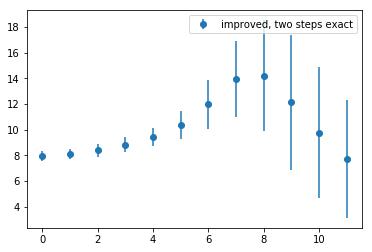

In [7]:
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend = []
n=0
lastpt = 12
for p, stats in player_stats.items():
    lines.append(\
        plt.errorbar(np.array(range(lastpt))+n,stats['mu'][0:lastpt], 
                     yerr=stats['std'][0:lastpt], fmt='o'))
    legend.append(p)
    n+= 0.1

plt.legend(lines,legend)
plt.show()

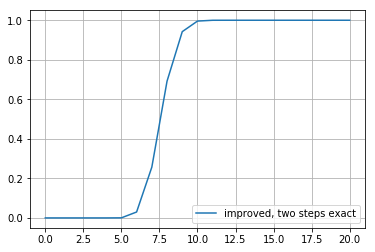

In [8]:
plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend =[]
for p, stats in player_stats.items():
    lines.append(\
        plt.plot(range(len(stats['mu'])),stats['strict_win'] + stats['strict_loss']))
    legend.append(p)
plt.legend(legend)
plt.grid()
plt.show()

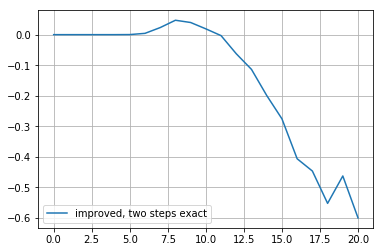

In [9]:
plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend =[]
for p, stats in player_stats.items():
    lines.append(\
        plt.plot(range(len(stats['mu'])),stats['strict_win']-stats['strict_loss']))
    legend.append(p)
plt.legend(legend)
plt.grid()
plt.show()